In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# load the data
final_df= pd.read_csv(Path('./Resources/joined_df.csv'))
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers
0,Alabama,4874486,241,530018,0.000049,0.108733,293556,236498,91653
1,Alaska,739700,28,44862,0.000038,0.060649,23045,13385,6984
2,Arizona,7044008,494,501839,0.000070,0.071243,267683,227196,74093
3,Arkansas,3001345,235,299417,0.000078,0.099761,180694,146161,63780
4,California,39358497,1761,2593251,0.000045,0.065888,1403613,988700,339093


In [3]:
# calculate per capita rates for obesity, inactivity, and smokers
final_df['obesity_per_capita'] = final_df['number_of_obesity_cases']/final_df['state_population']
final_df['inactivity_per_capita'] = final_df['number_of_inactive_adults']/final_df['state_population']
final_df['smokers_per_capita'] = final_df['number_of_smokers']/final_df['state_population']
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers,obesity_per_capita,inactivity_per_capita,smokers_per_capita
0,Alabama,4874486,241,530018,0.000049,0.108733,293556,236498,91653,0.060223,0.048518,0.018803
1,Alaska,739700,28,44862,0.000038,0.060649,23045,13385,6984,0.031155,0.018095,0.009442
2,Arizona,7044008,494,501839,0.000070,0.071243,267683,227196,74093,0.038002,0.032254,0.010519
3,Arkansas,3001345,235,299417,0.000078,0.099761,180694,146161,63780,0.060204,0.048699,0.021250
4,California,39358497,1761,2593251,0.000045,0.065888,1403613,988700,339093,0.035662,0.025120,0.008615


In [4]:
# drop columns with raw values
final_df= final_df.drop(['state_population', 'number_of_restaurants', 'number_of_diabetes_cases', 'number_of_inactive_adults', 'number_of_obesity_cases', 'number_of_smokers'], axis = 1)
final_df.head()

,state_name,restaurants_per_capita,diabetes_per_capita,obesity_per_capita,inactivity_per_capita,smokers_per_capita
0,Alabama,0.000049,0.108733,0.060223,0.048518,0.018803
1,Alaska,0.000038,0.060649,0.031155,0.018095,0.009442
2,Arizona,0.000070,0.071243,0.038002,0.032254,0.010519
3,Arkansas,0.000078,0.099761,0.060204,0.048699,0.021250
4,California,0.000045,0.065888,0.035662,0.025120,0.008615


In [5]:
# Create heatmap from raw data
final_df.style.background_gradient()

,state_name,restaurants_per_capita,diabetes_per_capita,obesity_per_capita,inactivity_per_capita,smokers_per_capita
0,Alabama,0.000049,0.108733,0.060223,0.048518,0.018803
1,Alaska,0.000038,0.060649,0.031155,0.018095,0.009442
2,Arizona,0.000070,0.071243,0.038002,0.032254,0.010519
3,Arkansas,0.000078,0.099761,0.060204,0.048699,0.021250
4,California,0.000045,0.065888,0.035662,0.025120,0.008615
5,Colorado,0.000052,0.049699,0.025702,0.016678,0.007081
6,Connecticut,0.000041,0.069730,0.036108,0.031674,0.010218
7,Delaware,0.000073,0.089363,0.052214,0.040915,0.012683
8,District of Columbia,0.000030,0.063824,0.035454,0.027526,0.013308
9,Florida,0.000049,0.084060,0.045784,0.040219,0.011343


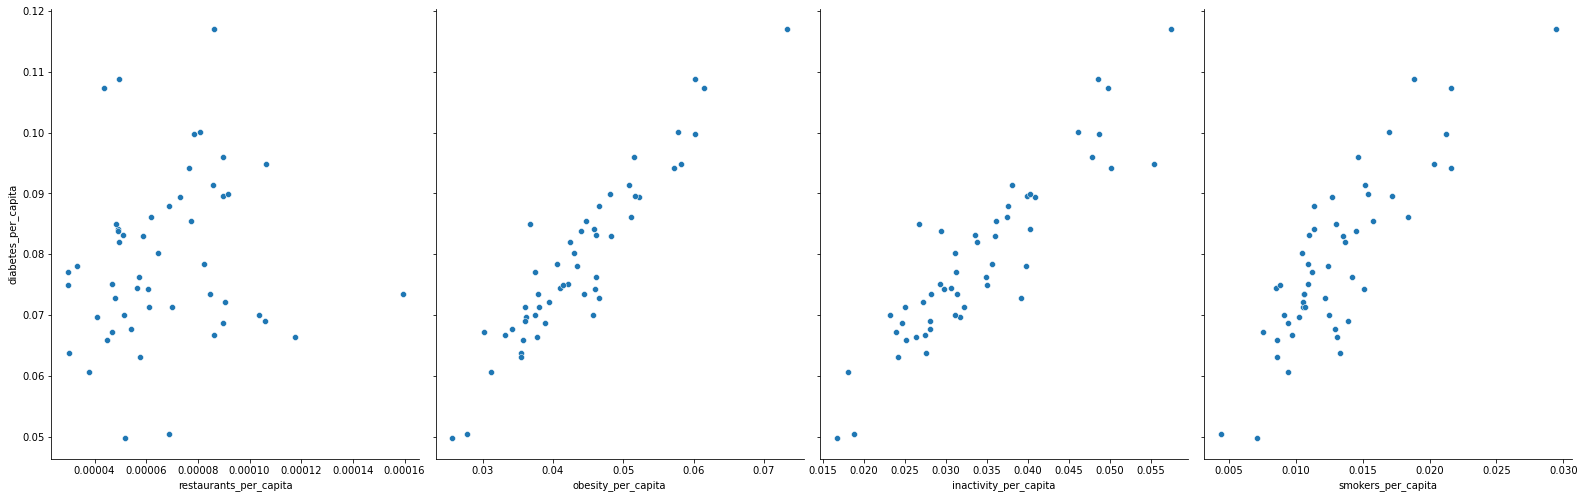

In [6]:
# visualize the relationship between the features and number of diabetes cases using scatterplots
sns.pairplot(final_df, x_vars=['restaurants_per_capita', 'obesity_per_capita', 'inactivity_per_capita', 'smokers_per_capita'],
             y_vars='diabetes_per_capita', height=7, aspect=0.8)

In [7]:
# scale the data
data_scaler = StandardScaler()
final_df[['restaurants_per_capita', 'diabetes_per_capita', 'obesity_per_capita', 'inactivity_per_capita', 'smokers_per_capita']] = data_scaler.fit_transform(final_df[['restaurants_per_capita', 'diabetes_per_capita', 'obesity_per_capita', 'inactivity_per_capita', 'smokers_per_capita']])
final_df.head()

,state_name,restaurants_per_capita,diabetes_per_capita,obesity_per_capita,inactivity_per_capita,smokers_per_capita
0,Alabama,-0.706459,2.162962,1.751992,1.579031,1.303258
1,Alaska,-1.162704,-1.338537,-1.341774,-1.709157,-0.813043
2,Arizona,0.114782,-0.567045,-0.613046,-0.178828,-0.569575
3,Arkansas,0.440104,1.509607,1.750010,1.598592,1.856668
4,California,-0.892924,-0.957029,-0.862014,-0.949841,-0.999821


In [8]:
# convert to csv
final_df.to_csv(r'Resources/final_df.csv', index=False)

In [10]:
#define the variables
features=['restaurants_per_capita', 'obesity_per_capita', 'inactivity_per_capita', 'smokers_per_capita']
X = final_df[features].values.reshape(-1, len(features))
y = final_df['diabetes_per_capita'].values

# split data using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# instantiate and fit
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate the model
mean_square = mean_squared_error(y_test, y_pred)
print(mean_square)

0.05038513375774567


In [10]:
# pair the feature names with the coefficients
list(zip(features, model.coef_))

[('restaurants_per_capita', -0.030057357822476365),
 ('obesity_per_capita', 0.6300753145536528),
 ('inactivity_per_capita', 0.25886812138822624),
 ('smokers_per_capita', 0.07472819130822267)]

In [11]:
# calculate intercept
model.intercept_

0.017177820618822517

In [12]:
#R-squared (i.e. accuracy score)
model.score(X, y)

0.8892347478843803

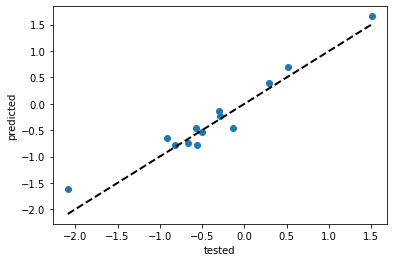

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('tested')
ax.set_ylabel('predicted')
plt.show()